[View in Colaboratory](https://colab.research.google.com/github/karangautam/Learning-Samples/blob/master/Boston_House_Prices.ipynb)

In [3]:
from keras.datasets import boston_housing

Using TensorFlow backend.


In [4]:
(train_data,train_labels),(test_data,test_labels)= boston_housing.load_data()

57344/57026 [==============================] - 0s 3us/step


In [5]:
print(train_data.shape)
print(test_data.shape)


(404, 13)
(102, 13)


In [0]:
mean= train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [7]:
train_data.shape[0]

404

In [0]:
from keras.layers import Dense
from keras.models import Sequential

def build_model():
  model= Sequential()
  model.add(Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mse',optimizer='rmsprop',metrics=['mae'])
  return model

In [13]:
import numpy as np
k=4
num_val_samples = len(train_data)//k
num_epochs = 100
all_scores = []

for i in range(k):
  print('processing fold # ', i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_labels[i*num_val_samples:(i+1)*num_val_samples]
  
  partial_train_data = np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([train_labels[:i*num_val_samples],train_labels[(i+1)*num_val_samples:]],axis=0)
  
  model = build_model()
  model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=1,validation_data=(val_data,val_targets),verbose =2)
  val_mse, val_mae = model.evaluate(val_data,val_targets,verbose=2)
  all_scores.append(val_mae)

processing fold #  0
Train on 303 samples, validate on 101 samples
Epoch 1/100
 - 2s - loss: 202.3814 - mean_absolute_error: 10.7722 - val_loss: 35.6699 - val_mean_absolute_error: 4.0277
Epoch 2/100
 - 2s - loss: 30.2373 - mean_absolute_error: 3.8334 - val_loss: 20.8735 - val_mean_absolute_error: 3.1098
Epoch 3/100
 - 2s - loss: 21.3092 - mean_absolute_error: 3.1753 - val_loss: 20.0278 - val_mean_absolute_error: 2.9640
Epoch 4/100
 - 2s - loss: 18.2486 - mean_absolute_error: 2.8959 - val_loss: 18.2133 - val_mean_absolute_error: 2.7662
Epoch 5/100
 - 2s - loss: 16.6024 - mean_absolute_error: 2.6640 - val_loss: 14.4925 - val_mean_absolute_error: 2.6143
Epoch 6/100
 - 2s - loss: 15.4888 - mean_absolute_error: 2.5713 - val_loss: 15.5081 - val_mean_absolute_error: 2.8297
Epoch 7/100
 - 2s - loss: 14.2158 - mean_absolute_error: 2.5346 - val_loss: 11.6177 - val_mean_absolute_error: 2.1780
Epoch 8/100
 - 2s - loss: 13.8676 - mean_absolute_error: 2.4219 - val_loss: 10.9579 - val_mean_absolute_e

Epoch 29/100
 - 2s - loss: 8.2561 - mean_absolute_error: 1.8483 - val_loss: 9.4016 - val_mean_absolute_error: 2.2593
Epoch 30/100
 - 2s - loss: 8.1531 - mean_absolute_error: 1.8470 - val_loss: 8.9889 - val_mean_absolute_error: 2.0760
Epoch 31/100
 - 2s - loss: 8.0918 - mean_absolute_error: 1.8821 - val_loss: 8.3211 - val_mean_absolute_error: 1.8413
Epoch 32/100
 - 2s - loss: 7.7916 - mean_absolute_error: 1.7844 - val_loss: 8.1176 - val_mean_absolute_error: 1.9159
Epoch 33/100
 - 2s - loss: 7.6513 - mean_absolute_error: 1.8420 - val_loss: 8.4504 - val_mean_absolute_error: 2.1325
Epoch 34/100
 - 2s - loss: 7.5455 - mean_absolute_error: 1.8289 - val_loss: 8.8618 - val_mean_absolute_error: 1.8850
Epoch 35/100
 - 2s - loss: 7.6217 - mean_absolute_error: 1.7378 - val_loss: 7.8906 - val_mean_absolute_error: 1.9406
Epoch 36/100
 - 2s - loss: 7.4117 - mean_absolute_error: 1.7156 - val_loss: 8.2792 - val_mean_absolute_error: 2.0886
Epoch 37/100
 - 2s - loss: 7.5525 - mean_absolute_error: 1.7246 

Epoch 58/100
 - 2s - loss: 5.8972 - mean_absolute_error: 1.5225 - val_loss: 9.1403 - val_mean_absolute_error: 2.1050
Epoch 59/100
 - 2s - loss: 5.9746 - mean_absolute_error: 1.5604 - val_loss: 8.9600 - val_mean_absolute_error: 2.1409
Epoch 60/100
 - 2s - loss: 6.3446 - mean_absolute_error: 1.5842 - val_loss: 9.1113 - val_mean_absolute_error: 1.9206
Epoch 61/100
 - 2s - loss: 6.2026 - mean_absolute_error: 1.6038 - val_loss: 8.6876 - val_mean_absolute_error: 2.1405
Epoch 62/100
 - 2s - loss: 6.1273 - mean_absolute_error: 1.5056 - val_loss: 8.2291 - val_mean_absolute_error: 1.9995
Epoch 63/100
 - 2s - loss: 5.4334 - mean_absolute_error: 1.5740 - val_loss: 8.1577 - val_mean_absolute_error: 2.0222
Epoch 64/100
 - 2s - loss: 5.9595 - mean_absolute_error: 1.5774 - val_loss: 8.2042 - val_mean_absolute_error: 2.0455
Epoch 65/100
 - 2s - loss: 5.7785 - mean_absolute_error: 1.5851 - val_loss: 7.6241 - val_mean_absolute_error: 1.9356
Epoch 66/100
 - 2s - loss: 5.6863 - mean_absolute_error: 1.5875 

Epoch 87/100
 - 2s - loss: 5.0229 - mean_absolute_error: 1.4279 - val_loss: 7.7606 - val_mean_absolute_error: 1.9944
Epoch 88/100
 - 2s - loss: 4.8519 - mean_absolute_error: 1.3601 - val_loss: 9.0031 - val_mean_absolute_error: 2.0874
Epoch 89/100
 - 2s - loss: 4.8782 - mean_absolute_error: 1.3756 - val_loss: 9.6533 - val_mean_absolute_error: 2.2723
Epoch 90/100
 - 2s - loss: 4.6245 - mean_absolute_error: 1.4165 - val_loss: 9.5989 - val_mean_absolute_error: 2.3180
Epoch 91/100
 - 2s - loss: 4.8354 - mean_absolute_error: 1.4213 - val_loss: 8.2242 - val_mean_absolute_error: 2.1121
Epoch 92/100
 - 2s - loss: 4.2343 - mean_absolute_error: 1.4214 - val_loss: 11.3349 - val_mean_absolute_error: 2.4489
Epoch 93/100
 - 2s - loss: 4.3612 - mean_absolute_error: 1.3937 - val_loss: 8.9671 - val_mean_absolute_error: 2.1652
Epoch 94/100
 - 2s - loss: 4.7804 - mean_absolute_error: 1.3864 - val_loss: 8.5343 - val_mean_absolute_error: 2.2297
Epoch 95/100
 - 2s - loss: 4.0152 - mean_absolute_error: 1.3361

 - 2s - loss: 9.5664 - mean_absolute_error: 2.0057 - val_loss: 10.6882 - val_mean_absolute_error: 2.5180
Epoch 16/100
 - 2s - loss: 10.2375 - mean_absolute_error: 2.0464 - val_loss: 9.3625 - val_mean_absolute_error: 2.3840
Epoch 17/100
 - 2s - loss: 9.4785 - mean_absolute_error: 2.0037 - val_loss: 10.9538 - val_mean_absolute_error: 2.5298
Epoch 18/100
 - 2s - loss: 9.7637 - mean_absolute_error: 2.0437 - val_loss: 10.6293 - val_mean_absolute_error: 2.5774
Epoch 19/100
 - 2s - loss: 9.5584 - mean_absolute_error: 2.0204 - val_loss: 9.5522 - val_mean_absolute_error: 2.3680
Epoch 20/100
 - 2s - loss: 9.1985 - mean_absolute_error: 2.0212 - val_loss: 9.6464 - val_mean_absolute_error: 2.4177
Epoch 21/100
 - 2s - loss: 9.4210 - mean_absolute_error: 2.0276 - val_loss: 9.5548 - val_mean_absolute_error: 2.3785
Epoch 22/100
 - 2s - loss: 8.9968 - mean_absolute_error: 1.9482 - val_loss: 9.2093 - val_mean_absolute_error: 2.3400
Epoch 23/100
 - 2s - loss: 9.0236 - mean_absolute_error: 1.9040 - val_los

Epoch 44/100
 - 2s - loss: 7.1223 - mean_absolute_error: 1.7256 - val_loss: 9.6454 - val_mean_absolute_error: 2.3597
Epoch 45/100
 - 2s - loss: 6.5423 - mean_absolute_error: 1.6563 - val_loss: 10.8575 - val_mean_absolute_error: 2.5355
Epoch 46/100
 - 2s - loss: 7.0189 - mean_absolute_error: 1.6693 - val_loss: 9.2731 - val_mean_absolute_error: 2.3665
Epoch 47/100
 - 2s - loss: 7.2189 - mean_absolute_error: 1.6844 - val_loss: 8.9352 - val_mean_absolute_error: 2.1956
Epoch 48/100
 - 2s - loss: 7.2997 - mean_absolute_error: 1.6882 - val_loss: 9.3094 - val_mean_absolute_error: 2.3382
Epoch 49/100
 - 2s - loss: 6.9003 - mean_absolute_error: 1.6611 - val_loss: 9.4290 - val_mean_absolute_error: 2.3386
Epoch 50/100
 - 2s - loss: 6.8364 - mean_absolute_error: 1.6507 - val_loss: 9.0365 - val_mean_absolute_error: 2.3339
Epoch 51/100
 - 2s - loss: 6.8553 - mean_absolute_error: 1.6319 - val_loss: 9.6643 - val_mean_absolute_error: 2.3761
Epoch 52/100
 - 2s - loss: 6.5201 - mean_absolute_error: 1.6139

Epoch 73/100
 - 2s - loss: 5.2495 - mean_absolute_error: 1.4688 - val_loss: 11.1585 - val_mean_absolute_error: 2.4415
Epoch 74/100
 - 2s - loss: 4.4805 - mean_absolute_error: 1.3864 - val_loss: 11.3273 - val_mean_absolute_error: 2.4633
Epoch 75/100
 - 2s - loss: 5.0988 - mean_absolute_error: 1.4632 - val_loss: 9.1450 - val_mean_absolute_error: 2.2675
Epoch 76/100
 - 2s - loss: 5.4266 - mean_absolute_error: 1.4659 - val_loss: 9.2283 - val_mean_absolute_error: 2.2687
Epoch 77/100
 - 2s - loss: 4.8271 - mean_absolute_error: 1.3854 - val_loss: 9.9458 - val_mean_absolute_error: 2.2460
Epoch 78/100
 - 2s - loss: 4.7261 - mean_absolute_error: 1.4385 - val_loss: 17.1178 - val_mean_absolute_error: 2.9386
Epoch 79/100
 - 2s - loss: 4.8235 - mean_absolute_error: 1.4674 - val_loss: 7.8562 - val_mean_absolute_error: 2.0261
Epoch 80/100
 - 2s - loss: 4.8993 - mean_absolute_error: 1.4474 - val_loss: 10.8978 - val_mean_absolute_error: 2.4651
Epoch 81/100
 - 2s - loss: 4.5266 - mean_absolute_error: 1.4

 - 2s - loss: 193.6122 - mean_absolute_error: 10.2644 - val_loss: 33.0595 - val_mean_absolute_error: 3.8035
Epoch 2/100
 - 2s - loss: 28.3937 - mean_absolute_error: 3.7039 - val_loss: 23.1496 - val_mean_absolute_error: 3.3257
Epoch 3/100
 - 2s - loss: 19.8315 - mean_absolute_error: 3.1649 - val_loss: 20.5515 - val_mean_absolute_error: 2.9490
Epoch 4/100
 - 2s - loss: 16.2212 - mean_absolute_error: 2.7842 - val_loss: 17.3995 - val_mean_absolute_error: 2.6206
Epoch 5/100
 - 2s - loss: 14.0283 - mean_absolute_error: 2.6240 - val_loss: 17.8744 - val_mean_absolute_error: 2.6678
Epoch 6/100
 - 2s - loss: 12.5096 - mean_absolute_error: 2.4976 - val_loss: 16.0593 - val_mean_absolute_error: 2.6571
Epoch 7/100
 - 2s - loss: 11.3146 - mean_absolute_error: 2.4308 - val_loss: 16.7361 - val_mean_absolute_error: 2.6602
Epoch 8/100
 - 2s - loss: 10.2922 - mean_absolute_error: 2.2853 - val_loss: 16.8216 - val_mean_absolute_error: 2.6425
Epoch 9/100
 - 2s - loss: 10.7829 - mean_absolute_error: 2.2391 - 

Epoch 30/100
 - 2s - loss: 6.0298 - mean_absolute_error: 1.7278 - val_loss: 15.7568 - val_mean_absolute_error: 2.6628
Epoch 31/100
 - 2s - loss: 6.2478 - mean_absolute_error: 1.7562 - val_loss: 14.3359 - val_mean_absolute_error: 2.5889
Epoch 32/100
 - 2s - loss: 6.3155 - mean_absolute_error: 1.6893 - val_loss: 15.4129 - val_mean_absolute_error: 2.5763
Epoch 33/100
 - 2s - loss: 6.0891 - mean_absolute_error: 1.6975 - val_loss: 15.1418 - val_mean_absolute_error: 2.6900
Epoch 34/100
 - 2s - loss: 5.9686 - mean_absolute_error: 1.6395 - val_loss: 15.6048 - val_mean_absolute_error: 2.7213
Epoch 35/100
 - 2s - loss: 5.9114 - mean_absolute_error: 1.7239 - val_loss: 14.5459 - val_mean_absolute_error: 2.5284
Epoch 36/100
 - 2s - loss: 5.7817 - mean_absolute_error: 1.6712 - val_loss: 15.6474 - val_mean_absolute_error: 2.5720
Epoch 37/100
 - 2s - loss: 6.0534 - mean_absolute_error: 1.6472 - val_loss: 14.2695 - val_mean_absolute_error: 2.5260
Epoch 38/100
 - 2s - loss: 5.9000 - mean_absolute_error:

Epoch 59/100
 - 2s - loss: 4.5831 - mean_absolute_error: 1.5016 - val_loss: 15.9219 - val_mean_absolute_error: 2.7189
Epoch 60/100
 - 2s - loss: 4.5379 - mean_absolute_error: 1.5259 - val_loss: 15.1699 - val_mean_absolute_error: 2.5772
Epoch 61/100
 - 2s - loss: 4.4870 - mean_absolute_error: 1.4962 - val_loss: 15.6647 - val_mean_absolute_error: 2.5673
Epoch 62/100
 - 2s - loss: 4.2369 - mean_absolute_error: 1.4835 - val_loss: 17.3341 - val_mean_absolute_error: 2.8667
Epoch 63/100
 - 2s - loss: 4.1059 - mean_absolute_error: 1.4906 - val_loss: 17.1404 - val_mean_absolute_error: 2.6626
Epoch 64/100
 - 2s - loss: 4.2632 - mean_absolute_error: 1.4803 - val_loss: 15.6649 - val_mean_absolute_error: 2.7041
Epoch 65/100
 - 2s - loss: 4.0964 - mean_absolute_error: 1.4215 - val_loss: 17.4816 - val_mean_absolute_error: 2.7725
Epoch 66/100
 - 2s - loss: 3.9117 - mean_absolute_error: 1.4302 - val_loss: 16.3615 - val_mean_absolute_error: 2.6716
Epoch 67/100
 - 2s - loss: 4.3419 - mean_absolute_error:

Epoch 88/100
 - 2s - loss: 3.1973 - mean_absolute_error: 1.3119 - val_loss: 16.5132 - val_mean_absolute_error: 2.6634
Epoch 89/100
 - 2s - loss: 3.3624 - mean_absolute_error: 1.2468 - val_loss: 18.4926 - val_mean_absolute_error: 2.8324
Epoch 90/100
 - 2s - loss: 3.4696 - mean_absolute_error: 1.3414 - val_loss: 16.5457 - val_mean_absolute_error: 2.6521
Epoch 91/100
 - 2s - loss: 3.3686 - mean_absolute_error: 1.3224 - val_loss: 17.9005 - val_mean_absolute_error: 2.8446
Epoch 92/100
 - 2s - loss: 3.0388 - mean_absolute_error: 1.2873 - val_loss: 19.2239 - val_mean_absolute_error: 2.8176
Epoch 93/100
 - 2s - loss: 3.0829 - mean_absolute_error: 1.2527 - val_loss: 17.7574 - val_mean_absolute_error: 2.6854
Epoch 94/100
 - 2s - loss: 3.0683 - mean_absolute_error: 1.3094 - val_loss: 17.0625 - val_mean_absolute_error: 2.7048
Epoch 95/100
 - 2s - loss: 3.1666 - mean_absolute_error: 1.2639 - val_loss: 18.4209 - val_mean_absolute_error: 2.7240
Epoch 96/100
 - 2s - loss: 2.8888 - mean_absolute_error:

 - 2s - loss: 10.0845 - mean_absolute_error: 2.0306 - val_loss: 18.7389 - val_mean_absolute_error: 2.8464
Epoch 17/100
 - 2s - loss: 10.0461 - mean_absolute_error: 1.9896 - val_loss: 19.6427 - val_mean_absolute_error: 2.7346
Epoch 18/100
 - 2s - loss: 9.7959 - mean_absolute_error: 2.0268 - val_loss: 18.9893 - val_mean_absolute_error: 2.7522
Epoch 19/100
 - 2s - loss: 9.0955 - mean_absolute_error: 1.9361 - val_loss: 16.1918 - val_mean_absolute_error: 2.7421
Epoch 20/100
 - 2s - loss: 9.7665 - mean_absolute_error: 1.9444 - val_loss: 15.7499 - val_mean_absolute_error: 2.5522
Epoch 21/100
 - 2s - loss: 8.8989 - mean_absolute_error: 1.9057 - val_loss: 15.6927 - val_mean_absolute_error: 2.5168
Epoch 22/100
 - 2s - loss: 9.0499 - mean_absolute_error: 1.9313 - val_loss: 14.1512 - val_mean_absolute_error: 2.5798
Epoch 23/100
 - 2s - loss: 8.5897 - mean_absolute_error: 1.9280 - val_loss: 17.8565 - val_mean_absolute_error: 2.7283
Epoch 24/100
 - 2s - loss: 8.7324 - mean_absolute_error: 1.8707 - v

Epoch 45/100
 - 2s - loss: 6.9609 - mean_absolute_error: 1.6454 - val_loss: 12.5991 - val_mean_absolute_error: 2.4746
Epoch 46/100
 - 2s - loss: 6.5731 - mean_absolute_error: 1.6968 - val_loss: 11.5860 - val_mean_absolute_error: 2.3780
Epoch 47/100
 - 2s - loss: 6.7951 - mean_absolute_error: 1.6346 - val_loss: 11.1563 - val_mean_absolute_error: 2.3278
Epoch 48/100
 - 2s - loss: 6.6718 - mean_absolute_error: 1.6114 - val_loss: 15.8304 - val_mean_absolute_error: 2.9610
Epoch 49/100
 - 2s - loss: 6.6026 - mean_absolute_error: 1.6471 - val_loss: 12.5546 - val_mean_absolute_error: 2.6033
Epoch 50/100
 - 2s - loss: 6.4549 - mean_absolute_error: 1.6153 - val_loss: 11.2850 - val_mean_absolute_error: 2.3476
Epoch 51/100
 - 2s - loss: 6.4271 - mean_absolute_error: 1.6272 - val_loss: 12.8295 - val_mean_absolute_error: 2.6787
Epoch 52/100
 - 2s - loss: 6.4579 - mean_absolute_error: 1.5880 - val_loss: 12.2057 - val_mean_absolute_error: 2.4337
Epoch 53/100
 - 2s - loss: 5.8523 - mean_absolute_error:

Epoch 74/100
 - 2s - loss: 5.2076 - mean_absolute_error: 1.3991 - val_loss: 11.1477 - val_mean_absolute_error: 2.3328
Epoch 75/100
 - 2s - loss: 5.1474 - mean_absolute_error: 1.4414 - val_loss: 11.3765 - val_mean_absolute_error: 2.3934
Epoch 76/100
 - 2s - loss: 4.8465 - mean_absolute_error: 1.3825 - val_loss: 12.5279 - val_mean_absolute_error: 2.4926
Epoch 77/100
 - 2s - loss: 4.5591 - mean_absolute_error: 1.3347 - val_loss: 11.4430 - val_mean_absolute_error: 2.3788
Epoch 78/100
 - 2s - loss: 5.0363 - mean_absolute_error: 1.3959 - val_loss: 11.9437 - val_mean_absolute_error: 2.4517
Epoch 79/100
 - 2s - loss: 4.9336 - mean_absolute_error: 1.4652 - val_loss: 11.8979 - val_mean_absolute_error: 2.5319
Epoch 80/100
 - 2s - loss: 4.6917 - mean_absolute_error: 1.3930 - val_loss: 11.8934 - val_mean_absolute_error: 2.4834
Epoch 81/100
 - 2s - loss: 4.6988 - mean_absolute_error: 1.3885 - val_loss: 11.7972 - val_mean_absolute_error: 2.4723
Epoch 82/100
 - 2s - loss: 4.8093 - mean_absolute_error:

In [14]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [16]:
import tensorflow as tf
import timeit

# See https://www.tensorflow.org/tutorials/using_gpu#allowing_gpu_memory_growth
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

with tf.device('/cpu:0'):
  random_image_cpu = tf.random_normal((100, 100, 100, 3))
  net_cpu = tf.layers.conv2d(random_image_cpu, 32, 7)
  net_cpu = tf.reduce_sum(net_cpu)

with tf.device('/gpu:0'):
  random_image_gpu = tf.random_normal((100, 100, 100, 3))
  net_gpu = tf.layers.conv2d(random_image_gpu, 32, 7)
  net_gpu = tf.reduce_sum(net_gpu)

sess = tf.Session(config=config)

# Test execution once to detect errors early.
try:
  sess.run(tf.global_variables_initializer())
except tf.errors.InvalidArgumentError:
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise

def cpu():
  sess.run(net_cpu)
  
def gpu():
  sess.run(net_gpu)
  
# Runs the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

sess.close()

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
8.594701675999886
GPU (s):
0.19023475400013012
GPU speedup over CPU: 45x


In [17]:
all_scores

[2.0581326413862775, 2.2001309324019025, 2.8750618802438868, 2.410775157484678]

In [18]:
np.mean(all_scores)

2.386025152879186

In [20]:
num_epochs=500
all_mae_histories=[]
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]    
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(                                     
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()                                                    
    history = model.fit(partial_train_data, partial_train_targets,           
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


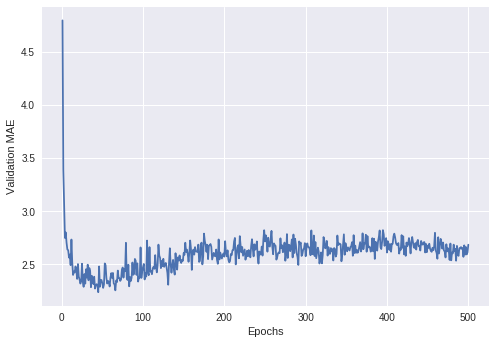

In [21]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

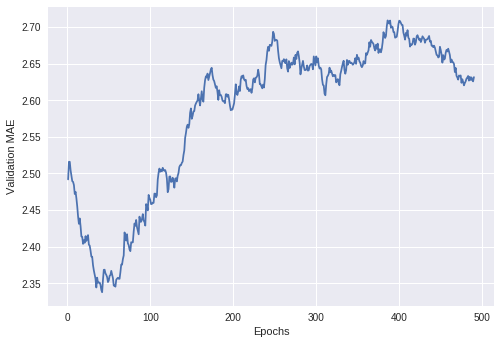

In [22]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [23]:
model = build_model()                                                     
model.fit(train_data, train_labels,                                      
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

102/102 [==============================] - 0s 993us/step


In [24]:
test_mae_score

2.6750271273594275